<a href="https://colab.research.google.com/github/jbakery/Python-Portfolio/blob/main/Adaptive_linear_Neuron_Adaline_Method_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
"""Importing Python Packages"""

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [35]:
class AdalineGD:

  """ADAptive LInear NEURON Classifier.

  Parameters
  ----------

  eta : float
    Learning rate (between 0.0 and 1.0)

  n_iter : int
    Passes over the training dataset.

  random_state : int
    Random number generator seed for random wight initialization.

  Attributes
  -----------

  w_ : 1d-array
    Weights after fitting

  b_ : Scalar
    Bias unit after fitting.

  losses_ : list
    Mean squared error loss function values in each epoch.

  """

  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    """Fit training data. 

  Parameters
  ----------

  X : {array-like}, shape = [n_examples, n_features]
  Training vectors, where n_examples is the number of examples and 
  n_feature is the number of features.

  y : array-like, shape = [n_examples] Target values.

  Returns
-------

  self : object

    """

    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
    self.b_ = np.float_(0.)
    self.losses_ = []

    for i in range (self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
      self.b_ += self.eta * 2.0 * errors.mean()
      loss = (errors **2).mean()
      self.losses_.append(loss)
    return self

  def net_input(self, X):
      """Calculate net input"""
      return np.dot(X, self.w_) +  self.b_

  def activation(self, X):
      """Compute linear activation"""
      return X

  def predict(self, X):
      """Return class label after unit step"""
      return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0 )




In [36]:
"Training the Perceptron model"

import os
import pandas as pd

s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('FROM URL:', s)

df = pd.read_csv(s, header=None, encoding='utf-8')

df.tail()

FROM URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


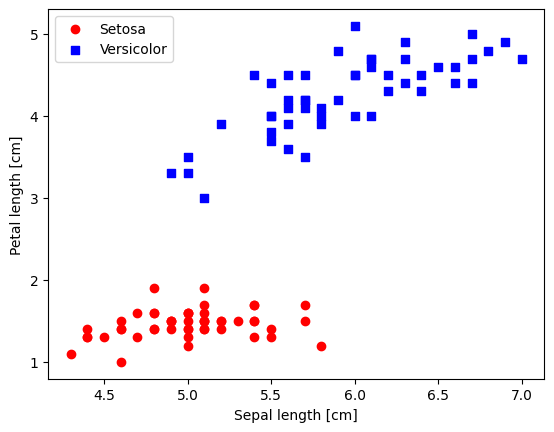

In [37]:
import matplotlib.pyplot as plt

""" Here we can see that a linear descision boundary should be sufficient to separate the Setosa from Versicolor flowers.
A linear classifier such as the perceptron should be able to classify the flowers in this dataset perfectly.""" 

# Select Setosa and Versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# Extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# Plot data
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='s', label='Versicolor')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

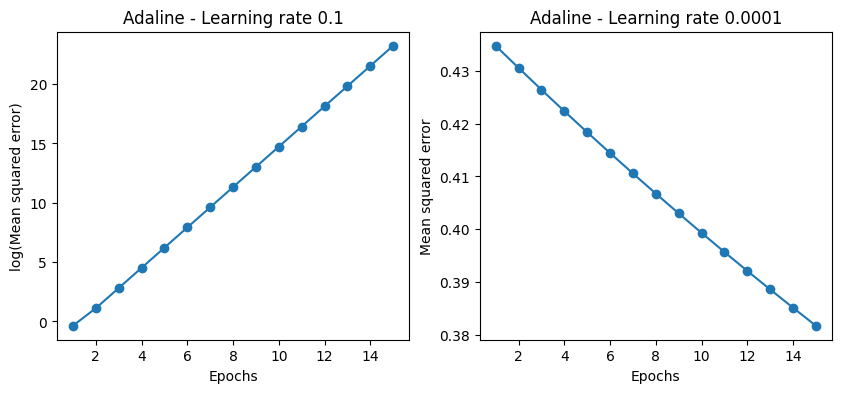

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')

ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_) + 1), ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()